In [1]:
import cv2
import numpy as np

In [2]:
# Load Yolo
net = cv2.dnn.readNet("./yolov3-df2_15000.weights", "./yolov3-df2.cfg")
classes = []
with open("df2.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [575]:
# Loading image
img = cv2.imread("./anchor2.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [576]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [577]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [578]:

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [579]:
font = cv2.FONT_HERSHEY_PLAIN
rectanglecontour=()
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[10]
        cv2.rectangle(img, (x, y), (x + w, y + h), 2)
        print(label)
        #rectanglecontour=(x,y,x+w,y+h)
        print(rectanglecontour)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
        
        if(i==0):
            
            rectanglecontour=(x,y,x+w,y+h)
        
cv2.imwrite("./a.jpg", img)

Topwear
()
shorts
(52, 111, 225, 343)


True

In [580]:
rectanglecontour

(52, 111, 225, 343)

In [581]:
img = cv2.imread('./a.jpg')
mask = np.full((img.shape[0], img.shape[1]), 255, dtype=np.uint8) 
cv2.imwrite("./mask.jpg", mask)

#mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
# Create a background array to hold white pixels
fgdModel = np.zeros((1,65),np.float64)
rect =rectanglecontour
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
cv2.imwrite("./final.jpg", img)

True

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os 

In [10]:
product_df = pd.read_csv('./styles.csv')

product_df['productImage'] = product_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
product_df = product_df.reset_index(drop=True)
product_df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11,productImage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,NaN,NaN,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,NaN,NaN,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,NaN,NaN,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,NaN,NaN,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,NaN,NaN,30039.jpg


In [584]:
product_df.columns

Index(['masterCategory', 'subCategory', 'articleType', 'baseColour',
       'productImage'],
      dtype='object')

In [11]:
product_df=product_df.drop(['gender','id','Unnamed: 10','Unnamed: 11','usage','season','year','productDisplayName'], axis=1)

<AxesSubplot:>

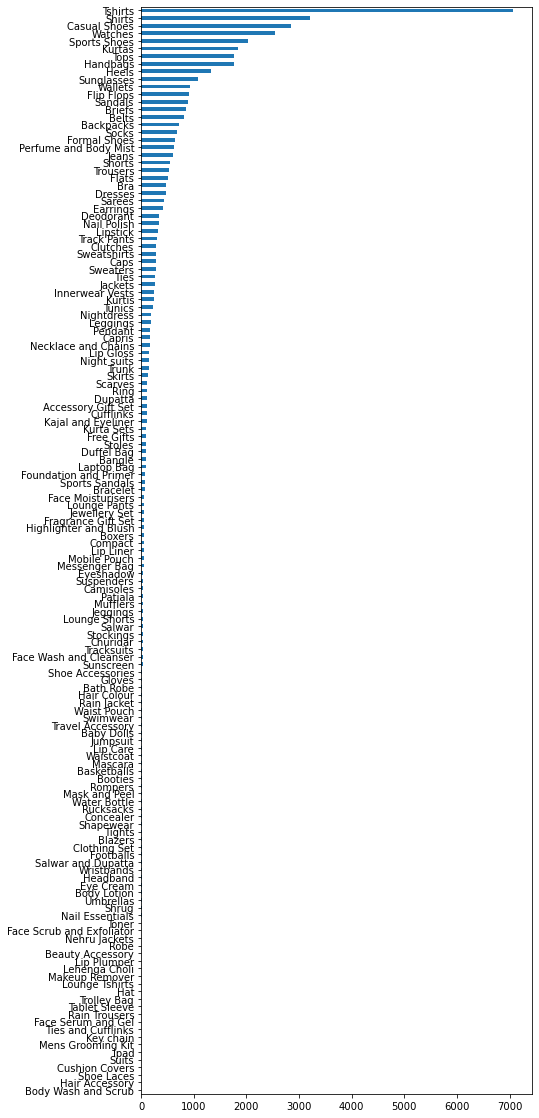

In [12]:
plt.figure(figsize=(7,20))
product_df.articleType.value_counts().sort_values().plot(kind='barh')

In [13]:
product_df.head()

,masterCategory,subCategory,articleType,baseColour,productImage
0,Apparel,Topwear,Shirts,Navy Blue,15970.jpg
1,Apparel,Bottomwear,Jeans,Blue,39386.jpg
2,Accessories,Watches,Watches,Silver,59263.jpg
3,Apparel,Bottomwear,Track Pants,Black,21379.jpg
4,Apparel,Topwear,Tshirts,Grey,53759.jpg


In [14]:
#product_df.gender.value_counts()

In [15]:
columns=['masterCategory','subCategory','articleType','baseColour']

In [16]:
product_df.masterCategory.value_counts()

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [17]:
product_df.subCategory.value_counts()

Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [18]:
product_df.articleType.value_counts()

Tshirts                7070
Shirts                 3217
Casual Shoes           2846
Watches                2542
Sports Shoes           2036
                       ... 
Ipad                      1
Suits                     1
Mens Grooming Kit         1
Cushion Covers            1
Body Wash and Scrub       1
Name: articleType, Length: 143, dtype: int64

In [19]:
product_df.baseColour.value_counts()

Black                9732
White                5540
Blue                 4922
Brown                3494
Grey                 2741
Red                  2458
Green                2116
Pink                 1861
Navy Blue            1791
Purple               1643
Silver               1090
Yellow                779
Beige                 749
Gold                  629
Maroon                581
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown           31
Mauve       

In [20]:
testdf=product_df.groupby(['masterCategory','subCategory','articleType','baseColour']).agg({'productImage':'sum'})

In [21]:
testdf.head(10)

productImage
masterCategory subCategory articleType        baseColour                                                   
Accessories    Accessories Accessory Gift Set Black       31187.jpg19926.jpg31186.jpg23114.jpg25076.jpg2...
                                              Blue        19929.jpg17366.jpg25047.jpg23115.jpg25046.jpg2...
                                              Brown       25055.jpg31204.jpg25064.jpg25062.jpg25065.jpg2...
                                              Grey                              25049.jpg25084.jpg23105.jpg
                                              Maroon      58920.jpg17367.jpg23106.jpg17368.jpg17372.jpg2...
                                              Multi                                               58921.jpg
                                              Navy Blue                         25063.jpg23100.jpg25077.jpg
                                              Pink                                       23101.jpg25072.jpg
                                              Purple      17369.jpg23108.jpg17359.jpg17361.jpg25054.jpg2...
                                              Red         17360.jpg23112.jpg25083.jpg19933.jpg58924.jpg1...

In [22]:
testdf.shape

(1937, 1)

In [23]:
testdf=testdf.reset_index(level=['masterCategory','subCategory','articleType','baseColour'])

In [24]:
testdf.head(20)

,masterCategory,subCategory,articleType,baseColour,productImage
0,Accessories,Accessories,Accessory Gift Set,Black,31187.jpg19926.jpg31186.jpg23114.jpg25076.jpg2...
1,Accessories,Accessories,Accessory Gift Set,Blue,19929.jpg17366.jpg25047.jpg23115.jpg25046.jpg2...
2,Accessories,Accessories,Accessory Gift Set,Brown,25055.jpg31204.jpg25064.jpg25062.jpg25065.jpg2...
3,Accessories,Accessories,Accessory Gift Set,Grey,25049.jpg25084.jpg23105.jpg
4,Accessories,Accessories,Accessory Gift Set,Maroon,58920.jpg17367.jpg23106.jpg17368.jpg17372.jpg2...
5,Accessories,Accessories,Accessory Gift Set,Multi,58921.jpg
6,Accessories,Accessories,Accessory Gift Set,Navy Blue,25063.jpg23100.jpg25077.jpg
7,Accessories,Accessories,Accessory Gift Set,Pink,23101.jpg25072.jpg
8,Accessories,Accessories,Accessory Gift Set,Purple,17369.jpg23108.jpg17359.jpg17361.jpg25054.jpg2...
9,Accessories,Accessories,Accessory Gift Set,Red,17360.jpg23112.jpg25083.jpg19933.jpg58924.jpg1...


In [25]:
my_string='18525.jpg18527.jpg18532.jpg'
counter = my_string.count(".jpg")
item=my_string.split(".jpg",counter)
print(my_string.split(".jpg",counter))
print(type(item[0]))

['18525', '18527', '18532', '']
<class 'str'>


In [26]:
for imageIndex in range(testdf.productImage.count()):
    #print(mainDf['encodedCategory'][ind], mainDf['Week'][ind]) 
    #print(testdf['productImage'][imageIndex])
    imageName=testdf['productImage'][imageIndex]
    print(imageName)
    counter = imageName.count(".jpg")
    #print(counter)
    imageList=imageName.split(".jpg",counter)
    if counter<=1:
        testdf['productImage'][imageIndex]= np.nan
    else :
        testdf['productImage'][imageIndex]=imageList
    
        
    
  
        
        
    

31187.jpg19926.jpg31186.jpg23114.jpg25076.jpg25082.jpg25078.jpg58923.jpg31184.jpg58922.jpg31182.jpg25067.jpg23103.jpg31201.jpg25081.jpg25080.jpg25074.jpg
19929.jpg17366.jpg25047.jpg23115.jpg25046.jpg25070.jpg19934.jpg23102.jpg25069.jpg25056.jpg25058.jpg17365.jpg23110.jpg23117.jpg25045.jpg17379.jpg19930.jpg19937.jpg
25055.jpg31204.jpg25064.jpg25062.jpg25065.jpg25053.jpg31202.jpg25071.jpg31192.jpg31193.jpg31183.jpg31185.jpg31200.jpg25050.jpg31206.jpg19936.jpg31191.jpg31190.jpg
25049.jpg25084.jpg23105.jpg
58920.jpg17367.jpg23106.jpg17368.jpg17372.jpg25079.jpg19932.jpg17363.jpg17362.jpg25068.jpg25075.jpg25073.jpg23099.jpg19931.jpg
58921.jpg
25063.jpg23100.jpg25077.jpg
23101.jpg25072.jpg
17369.jpg23108.jpg17359.jpg17361.jpg25054.jpg23109.jpg23107.jpg23113.jpg17375.jpg17374.jpg17373.jpg25048.jpg19935.jpg25051.jpg25060.jpg25059.jpg25061.jpg17378.jpg17370.jpg17377.jpg
17360.jpg23112.jpg25083.jpg19933.jpg58924.jpg17364.jpg23104.jpg17376.jpg17371.jpg23116.jpg23118.jpg
37638.jpg
25066.jpg
25057.j

48114.jpg48125.jpg33729.jpg48120.jpg48119.jpg33730.jpg42964.jpg
25752.jpg
17075.jpg18808.jpg42956.jpg34545.jpg21012.jpg41023.jpg42896.jpg42898.jpg18813.jpg27839.jpg25727.jpg33483.jpg17064.jpg3710.jpg27834.jpg
18807.jpg
57539.jpg25110.jpg18809.jpg20971.jpg20990.jpg25753.jpg18812.jpg18016.jpg30149.jpg19887.jpg17779.jpg19889.jpg18810.jpg18014.jpg25750.jpg25733.jpg25751.jpg25756.jpg
38417.jpg42900.jpg33725.jpg
35077.jpg
24778.jpg20542.jpg42903.jpg33466.jpg18021.jpg33460.jpg20606.jpg24786.jpg42901.jpg50213.jpg50224.jpg42914.jpg
33480.jpg20401.jpg33481.jpg38404.jpg24777.jpg21001.jpg33727.jpg50221.jpg37050.jpg37061.jpg38416.jpg38418.jpg33467.jpg33471.jpg20514.jpg20994.jpg38413.jpg37054.jpg20473.jpg37064.jpg
27840.jpg25099.jpg42951.jpg42905.jpg14588.jpg33728.jpg50220.jpg50218.jpg27836.jpg17060.jpg37058.jpg25103.jpg37056.jpg37230.jpg18020.jpg42897.jpg8928.jpg17076.jpg18805.jpg33476.jpg50222.jpg14905.jpg42912.jpg20416.jpg37065.jpg37062.jpg17062.jpg38415.jpg
16993.jpg33484.jpg33470.jpg48117.jpg
1

31892.jpg34309.jpg31078.jpg34973.jpg
35023.jpg34972.jpg34966.jpg
31896.jpg35026.jpg35016.jpg31075.jpg
35007.jpg35013.jpg35011.jpg
35103.jpg35027.jpg
15946.jpg58916.jpg15949.jpg36350.jpg36361.jpg58917.jpg18780.jpg50293.jpg40234.jpg50294.jpg58897.jpg50295.jpg50286.jpg40210.jpg49735.jpg50288.jpg50289.jpg49733.jpg18769.jpg58876.jpg58882.jpg15953.jpg11157.jpg58915.jpg36355.jpg36354.jpg36365.jpg40206.jpg50297.jpg49715.jpg50290.jpg58895.jpg19232.jpg18770.jpg50291.jpg50296.jpg49722.jpg18785.jpg58894.jpg49753.jpg35088.jpg58881.jpg19217.jpg19221.jpg35087.jpg50284.jpg15950.jpg11155.jpg15959.jpg11152.jpg58900.jpg15956.jpg58906.jpg36370.jpg58908.jpg
36369.jpg36351.jpg49690.jpg36368.jpg58910.jpg36359.jpg49716.jpg18781.jpg19230.jpg49744.jpg49710.jpg49719.jpg49704.jpg49732.jpg35085.jpg19223.jpg58883.jpg35079.jpg50280.jpg49756.jpg58903.jpg49684.jpg15954.jpg11159.jpg36363.jpg36364.jpg50310.jpg12390.jpg36353.jpg49694.jpg50318.jpg49723.jpg18783.jpg49713.jpg49714.jpg19227.jpg58873.jpg49754.jpg17783.jpg4970

24305.jpg
56822.jpg27614.jpg23089.jpg8946.jpg44313.jpg51603.jpg14658.jpg11312.jpg26825.jpg27903.jpg11266.jpg8843.jpg15688.jpg44289.jpg40281.jpg40275.jpg27921.jpg15687.jpg34504.jpg8842.jpg27928.jpg15680.jpg40274.jpg16056.jpg16060.jpg59813.jpg39761.jpg43523.jpg12344.jpg14688.jpg14698.jpg26135.jpg14697.jpg9852.jpg11316.jpg13288.jpg37195.jpg27900.jpg12217.jpg12673.jpg11263.jpg27906.jpg12218.jpg30918.jpg16071.jpg11262.jpg8838.jpg15682.jpg15678.jpg27924.jpg15677.jpg13250.jpg23039.jpg13251.jpg23038.jpg
10257.jpg10259.jpg29780.jpg57136.jpg14695.jpg51605.jpg48380.jpg15118.jpg33815.jpg26154.jpg26153.jpg57139.jpg26162.jpg9894.jpg11324.jpg26136.jpg15748.jpg14693.jpg26138.jpg15110.jpg11267.jpg12285.jpg12679.jpg44667.jpg12214.jpg39806.jpg16072.jpg27902.jpg27905.jpg47677.jpg43223.jpg16021.jpg12678.jpg43224.jpg29402.jpg27911.jpg16800.jpg27920.jpg16066.jpg12290.jpg27184.jpg29683.jpg32404.jpg29848.jpg27910.jpg26831.jpg39812.jpg44288.jpg31014.jpg16067.jpg8952.jpg15132.jpg48395.jpg39795.jpg26140.jpg51485.

51000.jpg39541.jpg50978.jpg56277.jpg53466.jpg57320.jpg51049.jpg50973.jpg56306.jpg53462.jpg53464.jpg27121.jpg59082.jpg50969.jpg51021.jpg
53480.jpg53476.jpg
51817.jpg51017.jpg50966.jpg
56271.jpg53507.jpg50039.jpg53468.jpg56311.jpg27458.jpg27461.jpg57312.jpg27455.jpg27400.jpg57349.jpg
57336.jpg53478.jpg
59720.jpg56301.jpg
51204.jpg50979.jpg57331.jpg59740.jpg21638.jpg53498.jpg45088.jpg51020.jpg51010.jpg
45097.jpg50976.jpg57361.jpg51805.jpg30497.jpg30463.jpg27474.jpg56419.jpg51187.jpg53475.jpg59728.jpg30526.jpg21628.jpg56310.jpg53630.jpg30534.jpg21611.jpg57316.jpg57329.jpg51023.jpg57343.jpg30476.jpg51025.jpg39530.jpg39539.jpg27478.jpg50972.jpg27482.jpg27449.jpg30466.jpg51200.jpg51209.jpg51004.jpg56274.jpg59693.jpg30493.jpg53479.jpg27398.jpg30514.jpg53491.jpg53465.jpg21622.jpg59739.jpg53463.jpg45100.jpg51029.jpg30480.jpg59689.jpg57322.jpg54302.jpg41814.jpg27453.jpg17464.jpg50995.jpg
30496.jpg59691.jpg45096.jpg51008.jpg51030.jpg57358.jpg50970.jpg51785.jpg59726.jpg53631.jpg56299.jpg45076.jpg59

57069.jpg17628.jpg
6889.jpg6884.jpg6882.jpg17912.jpg
19744.jpg15465.jpg57067.jpg5560.jpg38156.jpg
15323.jpg6478.jpg59122.jpg1579.jpg18961.jpg18957.jpg15620.jpg36209.jpg30611.jpg22316.jpg15963.jpg17898.jpg19341.jpg14310.jpg15004.jpg15005.jpg23962.jpg14959.jpg24846.jpg19336.jpg15966.jpg
17153.jpg15962.jpg22317.jpg15964.jpg
30906.jpg19334.jpg15020.jpg
1662.jpg16190.jpg17154.jpg59115.jpg19855.jpg17904.jpg22608.jpg14309.jpg4848.jpg15047.jpg1622.jpg19333.jpg18205.jpg15319.jpg22363.jpg19857.jpg59126.jpg18518.jpg40051.jpg15601.jpg17151.jpg59118.jpg24136.jpg13120.jpg19331.jpg1610.jpg
18201.jpg59112.jpg59124.jpg27525.jpg59128.jpg19859.jpg19860.jpg59116.jpg59120.jpg19856.jpg
9532.jpg
6876.jpg
8785.jpg20377.jpg15039.jpg57066.jpg12807.jpg6877.jpg19012.jpg
10777.jpg25025.jpg20208.jpg12533.jpg23150.jpg9531.jpg
16196.jpg28540.jpg19004.jpg18512.jpg7686.jpg6785.jpg15626.jpg36200.jpg1530.jpg7769.jpg17900.jpg17150.jpg31443.jpg14961.jpg19243.jpg39754.jpg22323.jpg
31317.jpg
13241.jpg13240.jpg6477.jpg1584.jp

16361.jpg9658.jpg9656.jpg13877.jpg19182.jpg9269.jpg12278.jpg18319.jpg18317.jpg14723.jpg24526.jpg9519.jpg29636.jpg20322.jpg12284.jpg14983.jpg11062.jpg17165.jpg31619.jpg30796.jpg17178.jpg12255.jpg19847.jpg17183.jpg10478.jpg16389.jpg34050.jpg9664.jpg29322.jpg21122.jpg29384.jpg14035.jpg16339.jpg34051.jpg8781.jpg15140.jpg43483.jpg29635.jpg14787.jpg31639.jpg31092.jpg56765.jpg17169.jpg40255.jpg20318.jpg46362.jpg20177.jpg20183.jpg17157.jpg16047.jpg12245.jpg17166.jpg17192.jpg16406.jpg29826.jpg17186.jpg29616.jpg17725.jpg42520.jpg17189.jpg26803.jpg12235.jpg5425.jpg29390.jpg9270.jpg9421.jpg9648.jpg10612.jpg16340.jpg27894.jpg9420.jpg19709.jpg
34098.jpg59891.jpg35438.jpg57282.jpg47662.jpg40396.jpg37210.jpg23083.jpg56820.jpg33054.jpg
18913.jpg17168.jpg
15970.jpg37812.jpg8779.jpg8741.jpg27877.jpg41602.jpg15145.jpg16794.jpg14661.jpg9266.jpg10490.jpg16303.jpg39773.jpg16335.jpg12305.jpg19177.jpg25528.jpg8740.jpg6611.jpg37222.jpg21121.jpg59838.jpg40129.jpg51860.jpg12247.jpg33554.jpg9588.jpg17190.jpg6962.j

19123.jpg5646.jpg44209.jpg41921.jpg
9103.jpg
43299.jpg
24118.jpg25484.jpg40289.jpg24115.jpg
40777.jpg10804.jpg49809.jpg44723.jpg19122.jpg40785.jpg58326.jpg53882.jpg3629.jpg11857.jpg23794.jpg38552.jpg19870.jpg44216.jpg19877.jpg19879.jpg6173.jpg6180.jpg19878.jpg44217.jpg21217.jpg32801.jpg40754.jpg40753.jpg4732.jpg48531.jpg40755.jpg40780.jpg17025.jpg15710.jpg49835.jpg44718.jpg21185.jpg19868.jpg44207.jpg19866.jpg21469.jpg11852.jpg35665.jpg19867.jpg53449.jpg6163.jpg53447.jpg11847.jpg10767.jpg10769.jpg6178.jpg6182.jpg43009.jpg44213.jpg6114.jpg44733.jpg53723.jpg33860.jpg40759.jpg44735.jpg15394.jpg34814.jpg2494.jpg53725.jpg
21187.jpg39546.jpg19928.jpg21181.jpg5631.jpg47106.jpg30250.jpg40294.jpg10180.jpg11867.jpg20949.jpg47087.jpg46101.jpg4002.jpg4005.jpg10741.jpg15873.jpg10762.jpg32184.jpg49825.jpg26375.jpg5622.jpg39956.jpg13686.jpg36308.jpg43300.jpg5784.jpg24114.jpg47091.jpg15878.jpg6122.jpg10766.jpg30246.jpg
12529.jpg
41866.jpg57501.jpg6396.jpg6408.jpg2803.jpg44550.jpg2634.jpg41456.jpg15311.

56545.jpg
56543.jpg
23580.jpg
26735.jpg28238.jpg28231.jpg22555.jpg28253.jpg59005.jpg28230.jpg44949.jpg32531.jpg43100.jpg45715.jpg44054.jpg27304.jpg23598.jpg54064.jpg23597.jpg45566.jpg45762.jpg27328.jpg23547.jpg45567.jpg28241.jpg46653.jpg46899.jpg44953.jpg32547.jpg44954.jpg44161.jpg46897.jpg46631.jpg32549.jpg44955.jpg44169.jpg46898.jpg44952.jpg28261.jpg22560.jpg28250.jpg44389.jpg44170.jpg28232.jpg28256.jpg58978.jpg32550.jpg27307.jpg46901.jpg26022.jpg45718.jpg23556.jpg23560.jpg21237.jpg46900.jpg59948.jpg43099.jpg45565.jpg41904.jpg27382.jpg21240.jpg45564.jpg23544.jpg44957.jpg28227.jpg32543.jpg44950.jpg46668.jpg26746.jpg28228.jpg46633.jpg20073.jpg28221.jpg44956.jpg28226.jpg46669.jpg
46646.jpg28262.jpg28265.jpg32530.jpg59002.jpg58975.jpg58981.jpg59003.jpg52871.jpg28264.jpg28263.jpg45771.jpg27327.jpg59951.jpg23582.jpg44049.jpg28248.jpg44391.jpg28240.jpg26781.jpg58958.jpg46642.jpg43102.jpg28266.jpg43105.jpg28268.jpg46629.jpg26738.jpg28269.jpg46644.jpg22550.jpg28267.jpg46628.jpg58947.jpg44149.

42830.jpg8934.jpg
42828.jpg
42829.jpg


In [27]:
testdf.tail(500)

,masterCategory,subCategory,articleType,baseColour,productImage
1437,Footwear,Sandal,Sandals,Green,"[4112, 22248, 15858, 13973, 15888, 40308, 7985..."
1438,Footwear,Sandal,Sandals,Grey,"[19927, 42011, 41455, 43957, 43959, 2227, 6826..."
1439,Footwear,Sandal,Sandals,Khaki,"[44520, 22883, 22885, 39282, 39283, 39284, 435..."
1440,Footwear,Sandal,Sandals,Maroon,NaN
1441,Footwear,Sandal,Sandals,Multi,"[18493, 2802, 35556, ]"
...,...,...,...,...,...
1932,Sporting Goods,Sports Equipment,Footballs,Orange,NaN
1933,Sporting Goods,Sports Equipment,Footballs,White,"[2355, 1553, 1552, 1550, 1627, ]"
1934,Sporting Goods,Wristbands,Wristbands,Black,"[42830, 8934, ]"
1935,Sporting Goods,Wristbands,Wristbands,Red,NaN


In [28]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   masterCategory  1937 non-null   object
 1   subCategory     1937 non-null   object
 2   articleType     1937 non-null   object
 3   baseColour      1937 non-null   object
 4   productImage    1359 non-null   object
dtypes: object(5)
memory usage: 75.8+ KB


In [29]:
testdf=testdf.dropna(axis=0)
testdf=testdf.reset_index(drop=True)

In [30]:
testdf.shape

(1359, 5)

In [31]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  
testdf['encodedArticleType']= label_encoder.fit_transform(testdf['articleType'])

In [33]:
testdf.head(40)

,masterCategory,subCategory,articleType,baseColour,productImage,encodedArticleType
0,Accessories,Accessories,Accessory Gift Set,Black,"[31187, 19926, 31186, 23114, 25076, 25082, 250...",0
1,Accessories,Accessories,Accessory Gift Set,Blue,"[19929, 17366, 25047, 23115, 25046, 25070, 199...",0
2,Accessories,Accessories,Accessory Gift Set,Brown,"[25055, 31204, 25064, 25062, 25065, 25053, 312...",0
3,Accessories,Accessories,Accessory Gift Set,Grey,"[25049, 25084, 23105, ]",0
4,Accessories,Accessories,Accessory Gift Set,Maroon,"[58920, 17367, 23106, 17368, 17372, 25079, 199...",0
5,Accessories,Accessories,Accessory Gift Set,Navy Blue,"[25063, 23100, 25077, ]",0
6,Accessories,Accessories,Accessory Gift Set,Pink,"[23101, 25072, ]",0
7,Accessories,Accessories,Accessory Gift Set,Purple,"[17369, 23108, 17359, 17361, 25054, 23109, 231...",0
8,Accessories,Accessories,Accessory Gift Set,Red,"[17360, 23112, 25083, 19933, 58924, 17364, 231...",0
9,Accessories,Accessories,Accessory Gift Set,Yellow,"[25057, 23111, ]",0


In [34]:
testdf = testdf.sample(frac = 1) 
testdf = testdf.reset_index(drop=True)

In [35]:
train_image = []
train_labels = []
shape = (80,80)
for i in tqdm(range(testdf.shape[0])):
    '''
    img = image.load_img('./images/'+testdf['productImage'][i][0]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    '''
    
    for m in range(len(testdf.productImage[i])-1):
    #for m in range(0,2):       
        #print(testdf['masterCategory'][i])
        train_labels.append(testdf['masterCategory'][i])
        #print(testdf['productImage'][i][m])
        img = cv2.imread('./images/'+testdf['productImage'][i][m]+'.jpg')
        img = cv2.resize(img,shape)
        train_image.append(img)
           
    
X = np.array(train_image)
# Converting labels into One Hot encoded sparse matrix
y = pd.get_dummies(train_labels).values


100%|██████████| 1359/1359 [19:44<00:00,  1.15it/s] 


In [36]:
from pandas import DataFrame

#People_List = train_labels

df = DataFrame (train_labels,columns=['category'])
df.category.value_counts()


Apparel           21170
Accessories       11123
Footwear           9179
Personal Care      2278
Free Items           86
Sporting Goods       17
Name: category, dtype: int64

In [37]:
def my_function(x):
  return list(dict.fromkeys(x))

mylist = my_function(train_labels)

product_dict = {}
keys = range(len(mylist))
print(keys)
values = train_labels
for i in keys:
        
        product_dict[i] = mylist[i]


range(0, 6)


In [38]:
X.shape

(43853, 80, 80, 3)

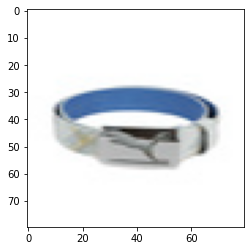

In [39]:
plt.imshow(X[154])

In [40]:

from tensorflow.keras.applications.resnet50 import ResNet50

In [41]:
base_model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(80, 80, 3))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [43]:
'''
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='sigmoid'))
variables_for_classification=1 #change it as per your number of categories
model.add(Dense(6, activation='softmax'))


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(80, 80, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
'''

'\nmodel = Sequential()\nmodel.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(80,80,3)))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=32, kernel_size=(5, 5), activation=\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=64, kernel_size=(5, 5), activation=\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation=\'relu\'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(128, activation=\'sigmoid\'))\nvariables_for_classification=1 #change it as per your number of categories\nmodel.add(Dense(6, activation=\'softmax\'))\n\n\nmodel = tf.keras.models.Sequential([\n    # Note the input shape is the desired size of the image 150x150 with 3 bytes color\n 

In [44]:
from __future__ import print_function
from tensorflow import keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k

In [45]:
#model= Sequential()
model=tf.keras.Sequential()
model = Sequential(base_model)
model.add(Flatten())

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


In [47]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
Dense(128,activation=('relu'))
#model.add(Dropout(.2))
model.add(Dense(6,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              18875392  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

[0 1 0 0 0 0]


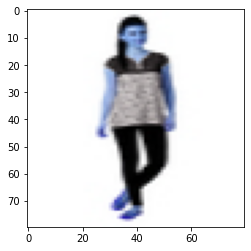

In [49]:
print(y[25])
plt.imshow(X[25])

In [50]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history=model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose = 1)

#history = model.fit_generator(X_train, y_train, epochs=25, validation_data =( X_test, y_test), verbose = 1, callbacks=[es])

1234/1234 [==============================] - 4349s 4s/step - loss: 0.1617 - accuracy: 0.8930 - val_loss: 0.2781 - val_accuracy: 0.8810


In [51]:
def mastercategory(testImage):
    test_image=[]
    shape = (80,80)
    img = cv2.imread(testImage)
    img = cv2.resize(img,shape)        
    test_image.append(img)
    testImage = np.array(test_image)


    predict = model.predict(testImage)

    print(predict)
    print(np.argmax(predict))

    output = {0: 'Accessories', 1: 'Apparel', 2: 'Footwear', 3: 'Free Items', 4: 'Personal Care', 5: 'Sporting Goods'}
    

    print("Predicted :- ",output[np.argmax(predict)])

    return output[np.argmax(predict)]

In [52]:
mastercategory('./final.jpg')

[[0.2737711  0.35032508 0.31942797 0.01577217 0.03414458 0.00655913]]
1
Predicted :-  Apparel


'Apparel'

In [56]:
import os
import numpy as np
from numpy.linalg import norm
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.inception_v3 import InceptionV3
import math
from sklearn.preprocessing import normalize

from keras.applications.vgg16 import preprocess_input


In [115]:
resnet50= ResNet50(weights='imagenet', include_top=False,
                 input_shape=(80, 80, 3))
#print(resnet50.summary())

modelFeature= Sequential()
modelFeature.add(resnet50) 
#model = tf.keras.Sequential()
#model.add(resnet50)
modelFeature.add(Flatten())
modelFeature.add(Dense(4096,activation=('relu'),input_dim=512))
modelFeature.add(Dense(4096,activation=('relu'))) 
modelFeature.add(Dense(1000,activation=('relu'))) 
modelFeature.add(tf.keras.layers.Embedding(100, 1, input_length=1000))
modelFeature.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelFeature.summary()

        

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 4096)              75501568  
_________________________________________________________________
dense_30 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_31 (Dense)             (None, 1000)              4097000   
_________________________________________________________________
embedding_8 (Embedding)      (None, 1000, 1)           100       
Total params: 119,967,692
Trainable params: 119,914,572
Non-trainable params: 53,120
__________________________________

In [389]:

def extract_features(img_path, model):
    input_shape = (80, 80, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    
    flattened_features = features.flatten()
    
    #normalized_feature = features / np.linalg.norm(features)
    normalized_feature = flattened_features / norm(flattened_features)    
    return features

In [137]:
features_anchor=extract_features('./anchor1.jpg',modelFeature)

In [138]:
features_positive=extract_features('./anchor2.jpg',modelFeature)

In [139]:
features_negative=extract_features('./anchor3.jpg',modelFeature)

In [141]:
from scipy import spatial
#print(features_negative)
result = 1-spatial.distance.cosine(features_test, features_negative)
print(result)

0.6959734559059143


In [144]:
d_ap=spatial.distance.cosine(features_anchor, features_positive)
d_an=spatial.distance.cosine(features_anchor, features_negative)
margin=0.2


loss = tf.maximum(0.0, margin + d_ap - d_an)
print(loss)

tf.Tensor(0.19074745, shape=(), dtype=float32)


In [173]:
import random
training=[]
label=[]
shape = (80,80)
for i in tqdm(range(testdf.shape[0])):
    batch=[]
    label.append(testdf['masterCategory'][i])
    #img = './images/'+testdf['productImage'][i][0]+'.jpg'
    img = cv2.imread('./images/'+testdf['productImage'][i][0]+'.jpg')
    img = cv2.resize(img,shape)
    batch.append(img)
    #train_labels.append(testdf['masterCategory'][i])
    img = cv2.imread('./images/'+testdf['productImage'][i][1]+'.jpg')
    img = cv2.resize(img,shape)
    batch.append(img)
    index=random.randint(0, testdf.shape[0]-1)
    #train_labels.append(testdf['masterCategory'][index])
    #img = './images/'+testdf['productImage'][index][0]+'.jpg'
    img = cv2.imread('./images/'+testdf['productImage'][index][0]+'.jpg')
    img = cv2.resize(img,shape)
    batch.append(img)
    #print(batch)
    training.append(batch)
    
    

    
    
    
        
        
    
    

100%|██████████| 1359/1359 [01:30<00:00, 14.95it/s]


In [174]:
X = np.array(training)
X.shape

(1359, 3, 80, 80, 3)

In [175]:
from sklearn.preprocessing import LabelBinarizer

le = LabelBinarizer()

y = le.fit_transform(label)

In [176]:
y[0]

array([0, 0, 0, 0, 1, 0])

In [131]:
import tensorflow_addons as tfa

import os
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.datasets import mnist

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform,he_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.utils import plot_model,normalize
from tensorflow.keras import regularizers
from sklearn.metrics import roc_curve,roc_auc_score
from keras.regularizers import l2
#import keras.backend as K

In [377]:
def tripletLoss(anchor,positive,negative):
    d_ap=spatial.distance.cosine(anchor, positive)
    d_an=spatial.distance.cosine(anchor, negative)
    margin=0.2
    loss=np.maximum(d_ap - d_an + margin, 0)
    return loss
    

In [390]:
loss=[]
from statistics import mean
def similarityScore(anchor,postive,negative,network):
    features_anchor=extract_features(anchor,modelFeature)
    featurepostiveBatch_1=extract_features(postive[0],modelFeature)
    featurepostiveBatch_2=extract_features(postive[1],modelFeature)
    featureNagetive=extract_features(negative,modelFeature)
    loss.append(tripletLoss(features_anchor,featurepostiveBatch_1,featureNagetive))
    loss.append(tripletLoss(features_anchor,featurepostiveBatch_2,featureNagetive))
    return mean(loss) 
    
    
    
    
    
    


In [514]:
categoryList=[]
anchorBatch=[]
scoreList=[]
recommendation={}

def productRecommendation(searchImage):
    
    masterCategory=mastercategory(searchImage)
    categoryList.append(masterCategory)
    #filterImage_masterCategory = testdf[testdf['masterCategory']==masterCategory,productImage]
    filterImage_masterCategory = testdf[testdf.masterCategory.isin(category)]
    for i in range(filterImage_masterCategory.shape[0]):
        #print(i)
        archorList=filterImage_masterCategory['productImage'].iloc[i]
        #print(archorList)
        #randomIndex=random.randint(0,len(archorBatch)-1)
        indexAnchor=random.sample(range(0,len(archorList)-1),2)
     
        anchor1='./images/'+filterImage_masterCategory['productImage'].iloc[i][indexAnchor[0]]+'.jpg'
        anchor2='./images/'+filterImage_masterCategory['productImage'].iloc[i][indexAnchor[1]]+'.jpg'
        anchorBatch=[anchor1,anchor2]
        randomIndex=random.randint(0,filterImage_masterCategory.shape[0]-1)
        negative='./images/'+filterImage_masterCategory['productImage'].iloc[randomIndex][0]+'.jpg'
        score=similarityScore(searchImage,anchorBatch,negative,modelFeature)
        
        index=filterImage_masterCategory.index[i]
        scoreList.append(score)
        print(score)
        print(index)
        #recommendation.add(index, score) 
        recommendation.update({index: score})
        print(filterImage_masterCategory['articleType'].iloc[i])
        print(filterImage_masterCategory['baseColour'].iloc[i])
        """
        if score<=0.10:
            
            print(filterImage_masterCategory['subCategory'].iloc[i])
            print(filterImage_masterCategory['articleType'].iloc[i])
            print(filterImage_masterCategory['baseColour'].iloc[i])
        """    
    return recommendation,filterImage_masterCategory
    

In [515]:
testdf.head()

,masterCategory,subCategory,articleType,baseColour,productImage,encodedArticleType
0,Personal Care,Makeup,Eyeshadow,Pink,"[56139, 56138, 56148, ]",30
1,Personal Care,Skin Care,Face Wash and Cleanser,Green,"[57756, 57876, 57796, 57881, ]",33
2,Apparel,Apparel Set,Clothing Set,Red,"[35888, 36745, ]",20
3,Apparel,Loungewear and Nightwear,Night suits,Black,"[56225, 52017, 56248, 49781, 49786, 36252, 434...",78
4,Apparel,Loungewear and Nightwear,Lounge Shorts,Brown,"[51995, 51994, ]",66


In [516]:
category=['Apparel']
filterImage_masterCategory = testdf[testdf.masterCategory.isin(category)]


In [517]:
demo['merge']=testdf['baseColour']+testdf['articleType']
demo.head()

0                  PinkEyeshadow
1    GreenFace Wash and Cleanser
2                RedClothing Set
3               BlackNight suits
4             BrownLounge Shorts
dtype: object

In [550]:
recommendation,filterImage_masterCategory=productRecommendation('./final.jpg')

[[7.8180492e-02 2.2646956e-02 8.9645702e-01 6.7252642e-04 1.9697861e-03
  7.3298113e-05]]
2
Predicted :-  Footwear
0.19927357124057857
2
Clothing Set
Red
0.19926589254513538
3
Night suits
Black
0.19926338257120402
4
Lounge Shorts
Brown
0.19925729256518038
6
Camisoles
Pink
0.1992691558326916
10
Nightdress
Black
0.19927922489355063
12
Trousers
Coffee Brown
0.19925257419109837
13
Rompers
Blue
0.19925830805962297
17
Shirts
Teal
0.19923583642495477
21
Kurtas
Gold
0.19923445502801984
23
Kurtas
Rust
0.19923265519578687
24
Sarees
Navy Blue
0.19922666908418837
27
Leggings
Grey
0.19921826067800194
29
Shorts
Black
0.19919719873800204
33
Booties
Yellow
0.19920407430263634
34
Leggings
Red
0.1992120050109191
35
Sarees
Mustard
0.1991987703053206
37
Shrug
Pink
0.19919310095656573
38
Track Pants
Brown
0.19918056234443757
40
Briefs
Pink
0.1991649206113009
41
Shorts
Grey
0.1991865114173488
51
Waistcoat
Red
0.199185776044413
56
Nightdress
Peach
0.19920214051636095
57
Briefs
Purple
0.1992056272266723
63
Bo

0.19934557266178587
489
Leggings
White
0.1993553104239356
490
Briefs
Magenta
0.19935630441704993
492
Swimwear
Brown
0.1993585158039742
493
Jeans
Black
0.19933314427650703
496
Track Pants
Red
0.19934564979154362
498
Shirts
Black
0.19933374421468011
499
Sarees
Blue
0.19934122439585325
500
Skirts
Brown
0.19932315072100817
502
Suspenders
Red
0.19934853325269794
503
Capris
Navy Blue
0.19937431544006462
504
Jackets
Red
0.19936611281836583
507
Track Pants
Purple
0.19938080363913557
510
Capris
Yellow
0.19937361120446329
511
Kurtas
Sea Green
0.19935271806121582
515
Tracksuits
Charcoal
0.19936450352772525
519
Nightdress
Navy Blue
0.1993664006596502
521
Sarees
Cream
0.19935968522500305
523
Kurtas
Lavender
0.19936626144151248
525
Nightdress
Pink
0.19937782796929301
534
Jackets
Navy Blue
0.19938189322769406
540
Kurta Sets
Brown
0.1993843355649452
541
Tunics
Mustard
0.19939402766799513
543
Tunics
Multi
0.19940004238092499
547
Leggings
Blue
0.1994078162451397
549
Jumpsuit
Blue
0.19940460019144585
557

0.19944717005261284
936
Sarees
Brown
0.1994376335415056
941
Kurta Sets
Black
0.1994270110638646
942
Kurtis
Maroon
0.19942582306251083
943
Shorts
Olive
0.19943728764549423
946
Leggings
Rust
0.1994425867971946
953
Dupatta
Black
0.19944491951733642
954
Dupatta
Blue
0.19944452127493487
956
Shorts
Charcoal
0.19945153287776773
957
Briefs
Multi
0.19946470725785645
960
Dresses
Peach
0.1994664732051698
961
Shorts
Blue
0.19947354058175432
965
Bath Robe
Pink
0.19950075623496685
967
Kurta Sets
Yellow
0.1994907993653444
968
Capris
White
0.1994973036525143
971
Trunk
Red
0.19950051088660017
975
Kurtas
Beige
0.19947914878942266
977
Tops
Purple
0.19948751029184397
978
Lounge Tshirts
Black
0.19947605929557502
979
Tunics
Navy Blue
0.19947235694533283
982
Track Pants
Pink
0.19946965661385418
984
Nehru Jackets
Brown
0.1994768546116913
987
Night suits
Red
0.19947287444369338
989
Dresses
Blue
0.19946539970252566
995
Salwar
White
0.19945937279276374
996
Kurta Sets
Cream
0.19946612903708488
998
Dupatta
Maroon


In [441]:
print(min(scoreList))

0.1994216928676683


In [551]:
filterImage_masterCategory.head()

,masterCategory,subCategory,articleType,baseColour,productImage,encodedArticleType
2,Apparel,Apparel Set,Clothing Set,Red,"[35888, 36745, ]",20
3,Apparel,Loungewear and Nightwear,Night suits,Black,"[56225, 52017, 56248, 49781, 49786, 36252, 434...",78
4,Apparel,Loungewear and Nightwear,Lounge Shorts,Brown,"[51995, 51994, ]",66
6,Apparel,Innerwear,Camisoles,Pink,"[52487, 52468, 27498, ]",15
10,Apparel,Loungewear and Nightwear,Nightdress,Black,"[52410, 59716, 59744, 57416, 55790, 52405, 524...",79


In [552]:
import operator
sortedLoss = {k: v for k, v in sorted(recommendation.items(), key=lambda item: item[1])}

In [553]:
sortedLoss

{41: 0.1991649206113009,
 105: 0.19917739001632473,
 40: 0.19918056234443757,
 104: 0.19918130895003913,
 56: 0.199185776044413,
 51: 0.1991865114173488,
 111: 0.19919240702086594,
 101: 0.19919264817223162,
 38: 0.19919310095656573,
 106: 0.19919667384556447,
 33: 0.19919719873800204,
 37: 0.1991987703053206,
 108: 0.1992014939623024,
 57: 0.19920214051636095,
 34: 0.19920407430263634,
 63: 0.1992056272266723,
 113: 0.19920669123194087,
 100: 0.1992088887036055,
 117: 0.19920913907564605,
 66: 0.199209578364142,
 118: 0.1992105553392703,
 119: 0.19921172996977204,
 35: 0.1992120050109191,
 269: 0.19921232429632427,
 280: 0.19921315818946755,
 267: 0.19921355915503508,
 274: 0.19921421667767228,
 92: 0.19921603771667443,
 65: 0.1992170286367732,
 29: 0.19921826067800194,
 266: 0.19922006818010776,
 262: 0.19922019919957465,
 94: 0.19922456425180957,
 90: 0.19922584104557575,
 27: 0.19922666908418837,
 270: 0.19922776779117357,
 91: 0.19922832708536206,
 78: 0.19923031553503318,
 77: 0.

In [582]:
indexMatch=list(sortedLoss)[:1]
#filterImage_masterCategory.loc[ 1334 , 'productImage' ]
print(indexMatch)

[41]


41


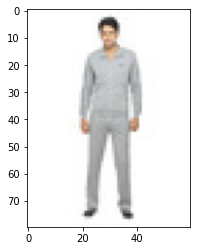

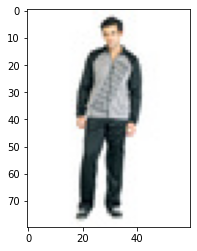

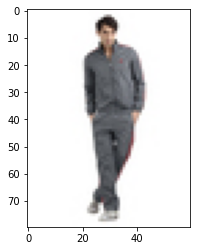

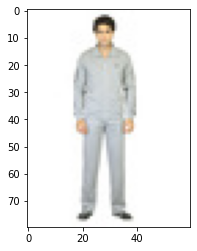

In [583]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for imageRec in range(len(indexMatch)):
    print(indexMatch[imageRec])
    productImageList=filterImage_masterCategory['productImage'].iloc[indexMatch[imageRec]]
    for image in range (len(productImageList)-1):
        img = mpimg.imread('./images/'+productImageList[image]+'.jpg')
        imgplot = plt.imshow(img)
        plt.show()
        
    
    
        

0.1998624019757394

['51009', '56416', '50964', '56300', '56294', '56292', '']